In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 21s 0us/step


In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
classes = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

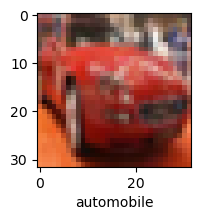

In [15]:
plot_sample(X_train, y_train, 5)

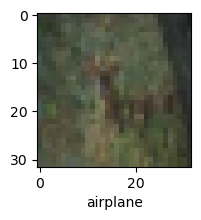

In [16]:
plot_sample(X_train, y_test, 10)

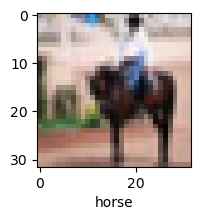

In [20]:
plot_sample(X_train, y_train, 11)

In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',  # Corrected spelling
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 129s 82ms/step - loss: 1.8157 - accuracy: 0.3522
Epoch 2/5
1563/1563 [==============================] - 149s 96ms/step - loss: 1.6261 - accuracy: 0.4256
Epoch 3/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.5441 - accuracy: 0.4547
Epoch 4/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4860 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.4352 - accuracy: 0.4953


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 31ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.52      0.57      0.54      1000
           1       0.67      0.53      0.59      1000
           2       0.28      0.51      0.36      1000
           3       0.28      0.47      0.35      1000
           4       0.56      0.21      0.30      1000
           5       0.49      0.22      0.30      1000
           6       0.38      0.73      0.50      1000
           7       0.66      0.38      0.48      1000
           8       0.79      0.37      0.51      1000
           9       0.63      0.49      0.55      1000

    accuracy                           0.45     10000
   macro avg       0.52      0.45      0.45     10000
weighted avg       0.52      0.45      0.45     10000



In [26]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

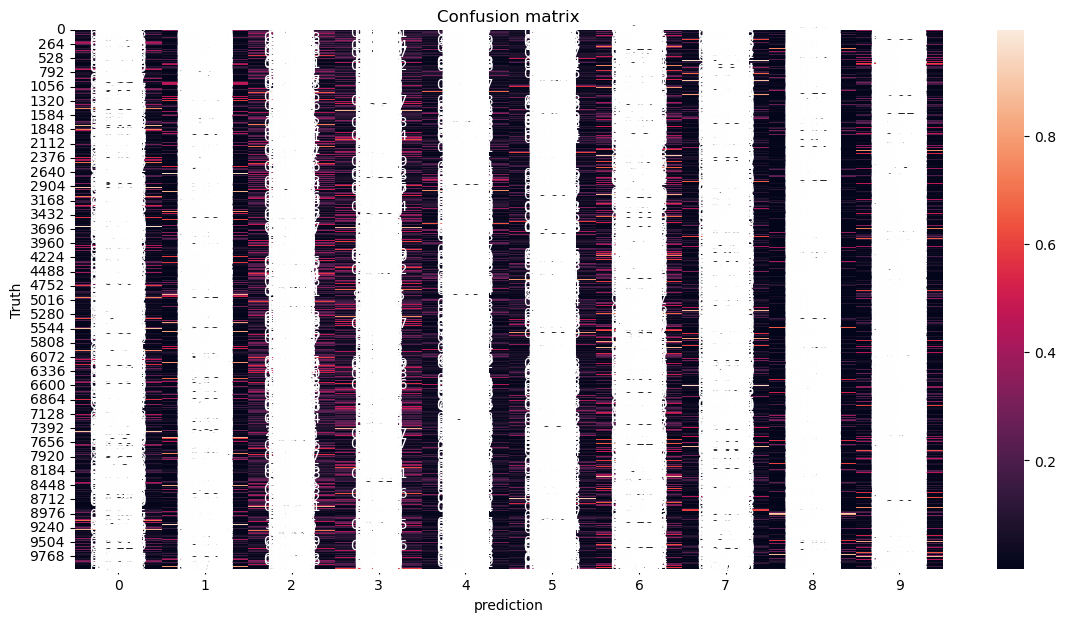

In [27]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('prediction')
plt.title('Confusion matrix')
plt.show

In [31]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),  # Corrected layer name
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),  # Corrected layer name
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [35]:
cnn.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])


In [36]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 1.4836 - accuracy: 0.4671
Epoch 2/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1650 - accuracy: 0.5886
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0488 - accuracy: 0.6324
Epoch 4/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9700 - accuracy: 0.6617
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9179 - accuracy: 0.6804
Epoch 6/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8706 - accuracy: 0.6963
Epoch 7/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8335 - accuracy: 0.7088
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7991 - accuracy: 0.7204
Epoch 9/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.7667 - accuracy: 0.7310
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [37]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 12ms/step - loss: 0.9199 - accuracy: 0.6874


[0.9198645353317261, 0.6873999834060669]

In [38]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[1.19896175e-03, 1.33437046e-04, 5.12448093e-03, 8.49769354e-01,
        1.34234841e-03, 6.66394457e-02, 6.96358234e-02, 5.23350958e-04,
        1.20220601e-03, 4.43064375e-03],
       [2.34912289e-03, 4.11461387e-03, 7.29338535e-06, 1.21779848e-07,
        1.66522458e-08, 1.89160865e-09, 9.30252930e-10, 1.52976826e-10,
        9.93437469e-01, 9.12779433e-05],
       [6.40879720e-02, 5.13107702e-02, 5.40347421e-04, 3.33144027e-03,
        1.39726719e-04, 8.62520828e-05, 2.92625136e-05, 1.03169215e-04,
        8.37917149e-01, 4.24538553e-02],
       [9.16342080e-01, 2.88432427e-02, 1.05713808e-03, 1.09929897e-04,
        2.31161375e-05, 3.37149822e-06, 4.81298514e-07, 1.91208937e-06,
        5.32669015e-02, 3.51725845e-04],
       [4.56723546e-06, 5.66078427e-07, 1.72345620e-02, 1.13060988e-01,
        5.07522941e-01, 8.29827040e-03, 3.53747815e-01, 1.56022872e-06,
        1.28580796e-04, 1.37310408e-07]], dtype=float32)

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

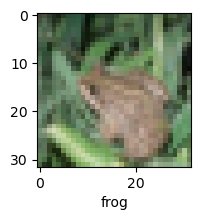

In [46]:
plot_sample(X_test, y_test, 4)

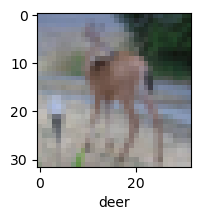

In [44]:
plot_sample(X_test, y_test, 100)

In [48]:
classes[y_classes[60]]

'horse'